In [12]:
import pandas as pd
import numpy as np
from pprint import pprint
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix
import seaborn as sn
import matplotlib.pyplot as plt

In [2]:
x_full = np.load('data/X.npy')
y_full = np.load('data/Y.npy')
x_full.shape

(2062, 64, 64)

In [3]:
fixed_state = 42
x_train, x_dev = train_test_split(x_full, test_size = 0.3, random_state=fixed_state)
y_train, y_dev = train_test_split(y_full, test_size = 0.3, random_state=fixed_state)
x_train.shape

(1443, 64, 64)

In [4]:
x_train_flat = x_train.reshape(x_train.shape[0], x_train.shape[1]*x_train.shape[2])
x_dev_flat = x_dev.reshape(x_dev.shape[0], x_dev.shape[1]*x_dev.shape[2])
x_train_flat.shape

(1443, 4096)

In [6]:
y_train_flat = [list(y).index(1) for y in y_train]
y_dev_flat = [list(y).index(1) for y in y_dev]

In [13]:
model = XGBClassifier()

In [14]:
model.fit(x_train_flat, y_train_flat)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='multi:softprob', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [15]:
predictions = model.predict(x_dev_flat)
predictions

array([2, 9, 3, 9, 0, 2, 3, 2, 6, 7, 4, 9, 7, 1, 2, 8, 0, 5, 0, 7, 0, 2,
       3, 1, 9, 2, 7, 3, 5, 9, 6, 5, 4, 6, 8, 6, 3, 1, 9, 2, 8, 8, 4, 1,
       1, 2, 5, 7, 8, 9, 1, 9, 6, 2, 1, 0, 2, 8, 2, 8, 2, 7, 2, 8, 5, 9,
       2, 2, 6, 4, 1, 1, 2, 7, 4, 9, 9, 4, 3, 8, 8, 9, 2, 0, 0, 0, 2, 4,
       1, 4, 5, 4, 7, 4, 7, 4, 2, 2, 8, 9, 4, 0, 9, 0, 2, 1, 8, 2, 8, 7,
       5, 8, 5, 3, 6, 5, 3, 1, 5, 5, 2, 0, 4, 5, 8, 2, 6, 5, 1, 0, 3, 1,
       9, 9, 8, 3, 3, 9, 5, 2, 2, 2, 2, 6, 6, 1, 6, 2, 4, 4, 9, 2, 0, 2,
       6, 2, 2, 6, 4, 1, 7, 4, 9, 8, 5, 2, 4, 7, 6, 9, 3, 7, 2, 9, 1, 6,
       7, 6, 0, 2, 1, 7, 4, 4, 1, 6, 6, 2, 4, 2, 8, 6, 8, 3, 2, 0, 8, 8,
       8, 5, 5, 7, 0, 8, 4, 4, 2, 5, 8, 8, 7, 0, 2, 8, 5, 3, 4, 3, 5, 0,
       6, 4, 3, 1, 7, 6, 4, 1, 7, 5, 8, 4, 7, 6, 2, 1, 2, 4, 6, 3, 5, 3,
       1, 0, 9, 0, 1, 2, 3, 7, 5, 4, 2, 0, 0, 4, 8, 5, 9, 2, 4, 7, 7, 8,
       3, 7, 3, 7, 7, 1, 1, 1, 3, 9, 5, 7, 7, 3, 6, 7, 5, 3, 6, 9, 1, 9,
       2, 9, 3, 3, 0, 0, 0, 8, 0, 6, 5, 2, 1, 0, 0,

In [16]:
predict_ok = []
true = 0
false = 0
for i in range(len(predictions)):
    if predictions[i] == y_dev_flat[i]:
        p = True 
        true += 1
        
    else:
        p = False
        false += 1
    
    predict_ok.append(p)
        
        
predict_ok
print('Nombres de prédictions Valide :',true)
print('Nombres de mauvaise prédictions :',false)

Nombres de prédictions Valide : 460
Nombres de mauvaise prédictions : 159


In [17]:
matrix_conf = confusion_matrix(list(y_dev_flat), predictions)
matrix_conf

array([[50,  0,  1,  0,  0,  2,  2,  0,  0,  0],
       [ 2, 55,  0,  2,  6,  0,  4,  0,  1,  0],
       [ 0,  0, 56,  1,  5,  4,  5,  0,  5,  0],
       [ 1,  1,  5, 44,  1,  1,  2,  0,  8,  0],
       [ 0,  3,  0,  1, 44,  2,  0,  0,  2,  0],
       [ 0,  0,  6,  0,  6, 38,  4,  0,  1,  0],
       [ 3,  1,  7, 10,  0,  2, 37,  1,  1,  3],
       [ 1,  0,  0,  0,  0,  0,  0, 52,  6,  3],
       [ 0,  0,  7,  7,  5,  0,  2,  1, 38,  0],
       [ 1,  0,  0,  0,  0,  1,  2, 11,  0, 46]])

In [18]:
df_cm = pd.DataFrame(matrix_conf, range(10), range(10))
df_cm

,0,1,2,3,4,5,6,7,8,9
0,50,0,1,0,0,2,2,0,0,0
1,2,55,0,2,6,0,4,0,1,0
2,0,0,56,1,5,4,5,0,5,0
3,1,1,5,44,1,1,2,0,8,0
4,0,3,0,1,44,2,0,0,2,0
5,0,0,6,0,6,38,4,0,1,0
6,3,1,7,10,0,2,37,1,1,3
7,1,0,0,0,0,0,0,52,6,3
8,0,0,7,7,5,0,2,1,38,0
9,1,0,0,0,0,1,2,11,0,46


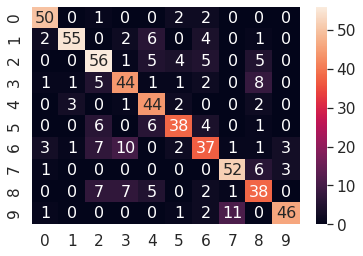

In [19]:
#plt.figure(figsize = (10,10))
sn.set(font_scale=1.4)#for label size
sn.heatmap(matrix_conf, annot=True,annot_kws={"size": 16})# font size

plt.show() 

In [26]:
from sklearn.metrics import accuracy_score

In [27]:
print (accuracy_score(y_dev_flat, predictions))

0.7431340872374798
